<a href="https://colab.research.google.com/github/joeytarnowski/cosc470s24/blob/main/solutions/cifar10_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!wget "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

--2024-03-22 16:20:33--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  50.5MB/s    in 3.6s    

2024-03-22 16:20:37 (45.4 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [20]:
!tar -xzvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [21]:
!git clone https://github.com/kartoone/DeepLearningPython nn

Cloning into 'nn'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 80 (delta 11), reused 5 (delta 1), pack-reused 55
Receiving objects: 100% (80/80), 16.44 MiB | 30.12 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [22]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def vectorize(label):
  result = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
  result[label] = 1.
  return np.reshape(result, (10,1))

50000
3072


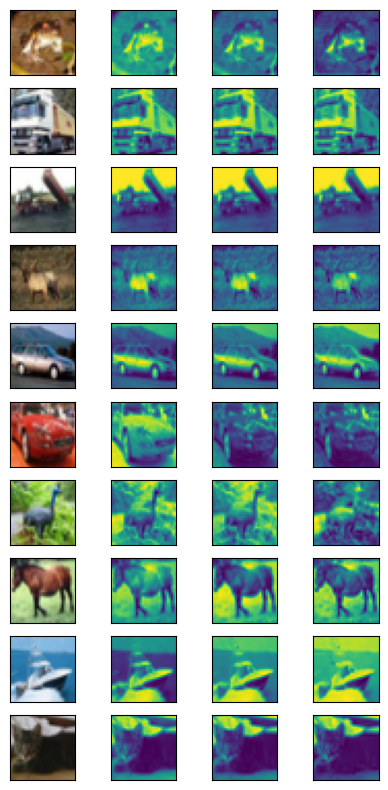

In [23]:
# Part 1
training = {'labels':[],'data':[]}
for i in range(1,6):
  filename = f"cifar-10-batches-py/data_batch_{i}"
  dict = unpickle(filename)
  training['labels'].extend(dict[b'labels'])
  training['data'].extend(dict[b'data'])

print(len(training['labels']))
print(len(training['data'][0]))


import numpy as np
import matplotlib.pyplot as plt

raw_test_data = unpickle("cifar-10-batches-py/test_batch")
red_test_data = [[np.reshape(d[:1024]/255, (1024,1)), label] for d, label in zip(raw_test_data [b'data'], raw_test_data[b'labels'])]
green_test_data = [[np.reshape(d[1024:2048]/255, (1024,1)), label] for d, label in zip(raw_test_data [b'data'], raw_test_data[b'labels'])]
blue_test_data = [[np.reshape(d[2048:]/255, (1024,1)), label] for d, label in zip(raw_test_data [b'data'], raw_test_data[b'labels'])]

np.set_printoptions(linewidth=1000000)
np.reshape(training['data'][0][:1024], (32,32))

red_training_data = [[np.reshape(d[:1024]/255, (1024,1)), vectorize(label)] for d, label in zip(training ['data'], training ['labels'])]
green_training_data = [[np.reshape(d[1024:2048]/255, (1024,1)), vectorize(label)] for d, label in zip(training ['data'], training ['labels'])]
blue_training_data = [[np.reshape(d[2048:]/255, (1024,1)), vectorize(label)] for d, label in zip(training ['data'], training ['labels'])]


training['data'] = np.array(training['data'])
training['data'] = training['data'].reshape(50000,3,32,32).transpose(0,2,3,1).astype("uint8")
fig, axes = plt.subplots(10, 4, figsize=(5,10))

for i in range(10):
  axes[i,0].imshow(training['data'][i])
  axes[i,1].imshow(np.reshape(red_training_data[i][0],(32,32)))
  axes[i,2].imshow(np.reshape(green_training_data[i][0],(32,32)))
  axes[i,3].imshow(np.reshape(blue_training_data[i][0],(32,32)))
  for c in range(4):
    axes[i,c].set_xticks([])
    axes[i,c].set_yticks([])


In [24]:
# Voting Function
import numpy as np
def vote(a1, a2, a3):
  a1vote = np.argmax(a1)
  a1max = np.max(a1)
  a2vote = np.argmax(a2)
  a2max = np.max(a3)
  a3vote = np.argmax(a2)
  a3max = np.max(a3)
  if a1vote == a2vote or a1vote == a3vote:
    return a1vote
  elif a2vote == a3vote:
    return a2vote
  else:
    return [a1vote, a2vote, a3vote][np.argmax([a1max, a2max, a3max])]

In [25]:
# Part 2
import numpy as np
import nn.network as network

# 3 networks, one per color channel
net_RED = network.Network([1024,30,10])
net_GREEN = network.Network([1024,30,10])
net_BLUE = network.Network([1024,30,10])

net_RED.SGD(red_training_data, 30, 10, 3.0, test_data=red_test_data)
net_GREEN.SGD(green_training_data, 30, 10, 3.0, test_data=green_test_data)
net_BLUE.SGD(blue_training_data, 30, 10, 3.0, test_data=blue_test_data)


Epoch 0 : 2168 / 10000
Epoch 1 : 1684 / 10000
Epoch 2 : 2192 / 10000
Epoch 3 : 2078 / 10000
Epoch 4 : 2218 / 10000
Epoch 5 : 2278 / 10000
Epoch 6 : 2280 / 10000
Epoch 7 : 2312 / 10000
Epoch 8 : 2274 / 10000
Epoch 9 : 2464 / 10000
Epoch 10 : 2445 / 10000
Epoch 11 : 1831 / 10000
Epoch 12 : 2183 / 10000
Epoch 13 : 2299 / 10000
Epoch 14 : 2187 / 10000
Epoch 15 : 2352 / 10000
Epoch 16 : 2534 / 10000
Epoch 17 : 2583 / 10000
Epoch 18 : 2177 / 10000
Epoch 19 : 2510 / 10000
Epoch 20 : 2366 / 10000
Epoch 21 : 2145 / 10000
Epoch 22 : 2628 / 10000
Epoch 23 : 2566 / 10000
Epoch 24 : 2538 / 10000
Epoch 25 : 2542 / 10000
Epoch 26 : 2635 / 10000
Epoch 27 : 2537 / 10000
Epoch 28 : 2265 / 10000
Epoch 29 : 2690 / 10000
Epoch 0 : 2139 / 10000
Epoch 1 : 2536 / 10000
Epoch 2 : 2222 / 10000
Epoch 3 : 2584 / 10000
Epoch 4 : 2312 / 10000
Epoch 5 : 2652 / 10000
Epoch 6 : 2410 / 10000
Epoch 7 : 2382 / 10000
Epoch 8 : 2402 / 10000
Epoch 9 : 2615 / 10000
Epoch 10 : 2410 / 10000
Epoch 11 : 2593 / 10000
Epoch 12 : 2

In [26]:
# Accuracy eval
correct_images = []
for i in range(len(red_test_data)):
  a1 = net_RED.feedforward(red_test_data[i][0])
  a2 = net_GREEN.feedforward(green_test_data[i][0])
  a3 = net_BLUE.feedforward(blue_test_data[i][0])
  ans = vote(a1,a2,a3)
  if ans == red_test_data[i][1]:
    correct_images.append(i)

print(f"Overall accuracy: {len(correct_images)/len(red_test_data)}")

Overall accuracy: 0.297


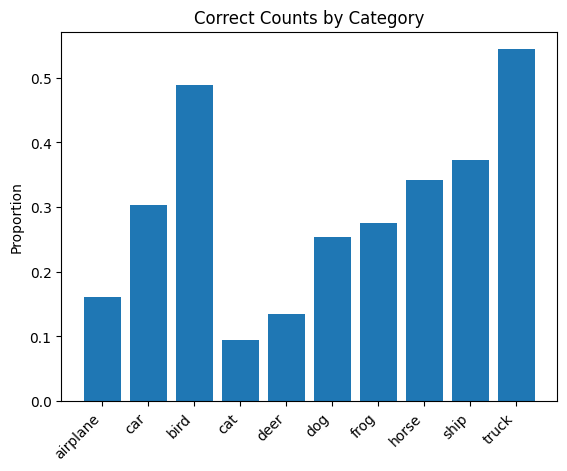

In [27]:
import matplotlib.pyplot as plt
import numpy as np
labels=["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
correct_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in correct_images:
  correct_counts[red_test_data[i][1]] += 1

# Convert to percent
correct_counts = np.array(correct_counts) / 1000

# Create chart
fix, ax = plt.subplots()
ax.bar(labels, correct_counts)

# Add labels and title
ax.set_ylabel('Proportion')
ax.set_title('Correct Counts by Category')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha="right")

plt.show()

In [28]:
# Part 3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
print ("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


Tensorflow version: 2.15.0
Keras version: 2.15.0


In [29]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [30]:
# Normalizing
X_train = X_train/255
X_test = X_test/255
# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test, 10)

In [31]:
model = Sequential()
model.add(Conv2D(32, (4,4), input_shape = (32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (4,4), input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [32]:
model.summary ()
history = model.fit(X_train, Y_train_en, epochs = 20, verbose=1, validation_data=(X_test,Y_test_en))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [33]:
# Comparing overall accuracy and per-category accuracy

# Get accuracy for CNN
correct_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
results = list(model.predict(X_test))
results = [np.argmax(result) for result in results]
labels = [label[0] for label in list(Y_test)]
for i, label in enumerate (labels):
  if results[i] == label:
    correct_counts[label] += 1
correct_counts = np.array (correct_counts) / 1000
print(correct_counts)

313/313 [==============================] - 5s 15ms/step
[0.708 0.788 0.553 0.443 0.575 0.641 0.786 0.689 0.762 0.768]


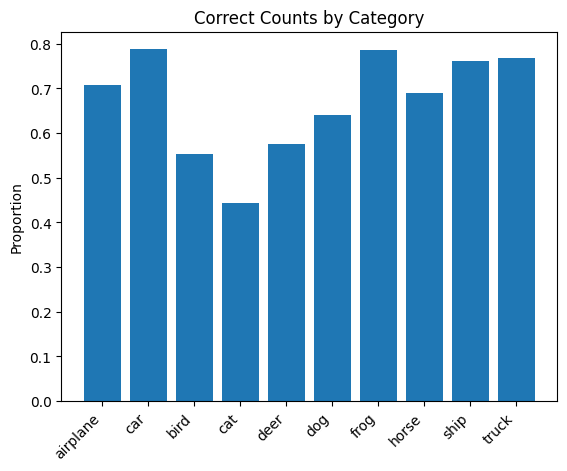

In [34]:
# Create chart for CNN
labels=["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
fig, ax = plt.subplots()
ax.bar(labels, correct_counts)

# Add labels and title
ax.set_ylabel('Proportion')
ax.set_title('Correct Counts by Category')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha="right")

plt.show()

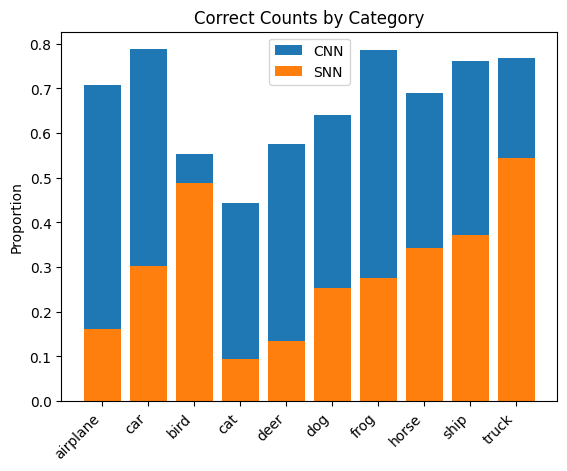

In [37]:
# Create comparison chart

# Accuracy eval for simple nn
correct_images = []
for i in range(len(red_test_data)):
  a1 = net_RED.feedforward(red_test_data[i][0])
  a2 = net_GREEN.feedforward(green_test_data[i][0])
  a3 = net_BLUE.feedforward(blue_test_data[i][0])
  ans = vote(a1,a2,a3)
  if ans == red_test_data[i][1]:
    correct_images.append(i)

correct_counts2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in correct_images:
  correct_counts2[red_test_data[i][1]] += 1

# Convert to percent
correct_counts2 = np.array(correct_counts2) / 1000

# Create chart
labels=["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
fig, ax = plt.subplots()
width = 0.4
ax.bar(labels, correct_counts)
ax.bar(labels, correct_counts2)

# Add labels and title
ax.set_ylabel('Proportion')
ax.set_title('Correct Counts by Category')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend(['CNN','SNN'])

plt.show()